In [1]:
# you need to run
# python run_trained_agents.py --has_cuda=0 --safe_max_rho 0.95 --limit_cs_margin 100. --expe_name figure_6 --nb_process 4 --training_iter 0 1000000 2000000 3000000 4000000 5000000 6000000 7000000 8000000 9000000 10000000 --path_agents /home/donnotben/Documents/2022_ADPRL_paper/PPO_one_week_trained
# before this notebook

"""
You need to run
python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 0.5 0.6 0.7 0.8 0.9 0.95 1.0 1.1 1.2 \
--limit_cs_margin 100. \
--expe_name figure_7_1 \
--nb_process XXX \
--path_agents XXX
before this notebook
"""

import matplotlib.pyplot as plt
import json
import os
import numpy as np

path = "."
with open (os.path.join(path, "agents_runs_figure_7_1.json"), "r") as f:
    dict_all_ = json.load(f)

In [8]:
score_safe_max_rho = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
              score_this.append(tmp_res_model["score_avg"])  
            score_safe_max_rho[safe_max_rho_] = (np.percentile(score_this, 20),
                                              np.percentile(score_this, 40),
                                              np.percentile(score_this, 50),
                                              np.percentile(score_this, 60),
                                              np.percentile(score_this, 80),
                                              )


Text(0, 0.5, 'score on validation set')

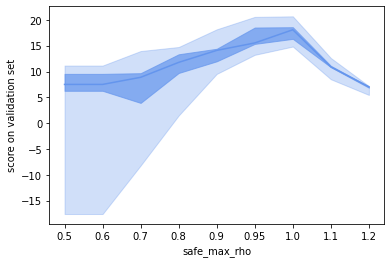

In [12]:
x_plt = sorted(score_safe_max_rho.keys(),
               key=lambda x: x)
x_displ = [el for el in x_plt]
plt.fill_between(x_displ,
                 y1=[score_safe_max_rho[el][0] for el in x_plt],
                 y2=[score_safe_max_rho[el][4] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.3
                 )
plt.fill_between(x_displ,
                 y1=[score_safe_max_rho[el][1] for el in x_plt],
                 y2=[score_safe_max_rho[el][3] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.7
                 )
plt.plot(x_displ,
         [score_safe_max_rho[el][2] for el in x_plt], 
         color="cornflowerblue")
plt.xlabel("safe_max_rho")
plt.ylabel("score on validation set")